# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [13]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [14]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

Crea un arreglo de x y un arreglo de y (de ceros), despuès cada elemento de x se le asigna a y.

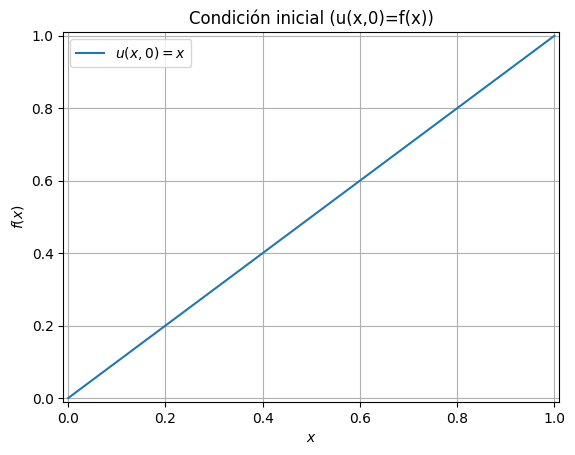

In [18]:
x = linspace(0,1,1000) #genera un arreglo de 1000 valores espaciados entre 0 y 1
f = recta(x)
plot(x,f,label='$u(x,0)=x$') #graficar f, etiqueta que se asigna a la gràfica
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); #etiqueta en el eje x.y
plt.title("Condición inicial (u(x,0)=f(x))") #Tìtulo a la gràfica
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend() #limites en x,y grid=cuadricula
show()

En esta gràfica tenemos como condiciòn incial t=0
Observamos que es constante

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [31]:
def u_0(x,N=100): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

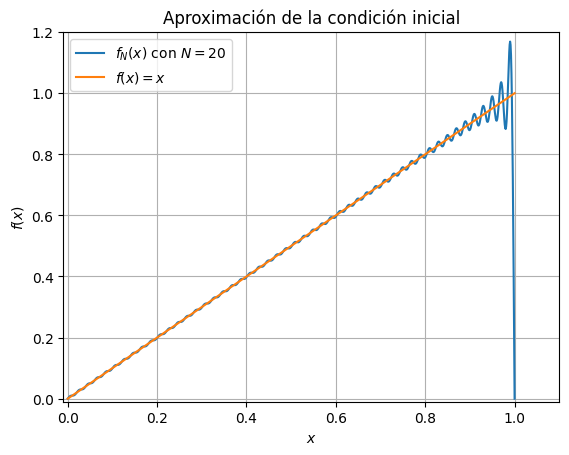

In [32]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')#grafica f_n en funcion de x,    etiqueta
plot(x,f,label='$f(x)=x$')#grafica y pone la etiqueta
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")#titulo de la gràfica
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()#limite, cuadrìcula
show()

En esta gràfica al cambiar el numero armònico N=20 observamos que se va a parecer cada màs a nuestra inicial excepto al final por la discontinuidad

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

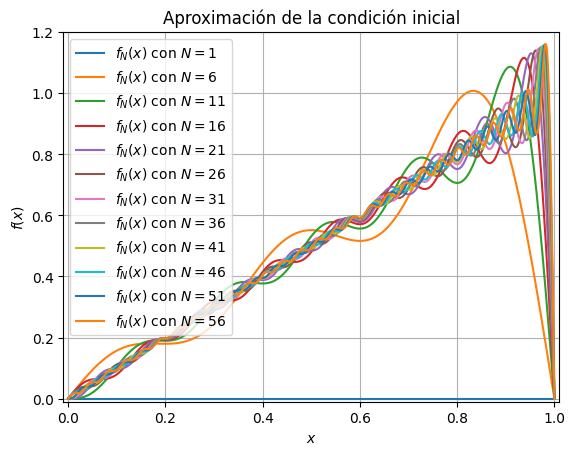

In [35]:
for i in range(1,59,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i) #etiqueta
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); #
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [36]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [37]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

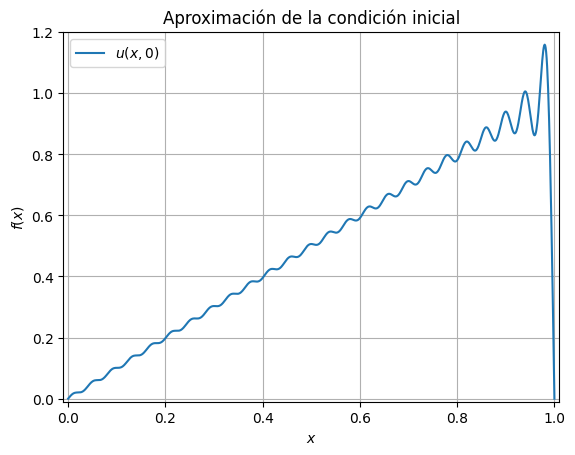

In [38]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

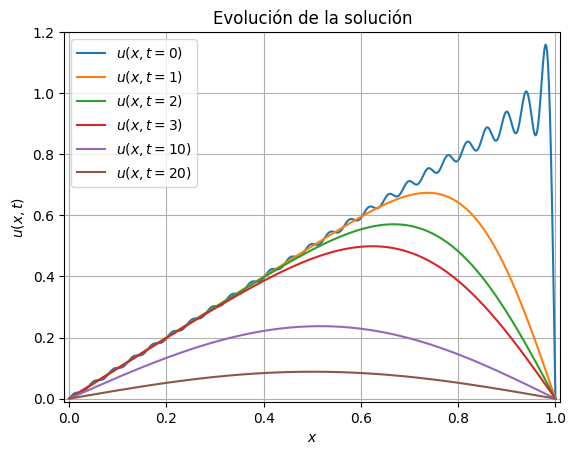

In [39]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

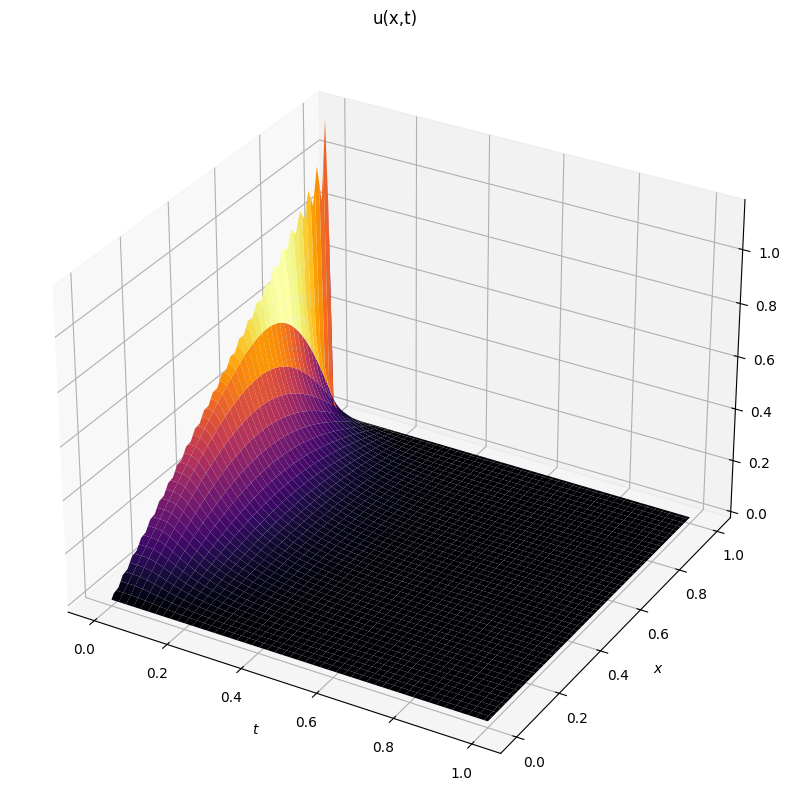

In [40]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"